In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('SAT_GPA.csv')
df

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59


In [3]:
df.head()

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [4]:
df.tail()

,SAT,GPA
95,1934,3.54
96,1861,3.58
97,1931,3.58
98,1933,3.59
99,1778,3.59


In [5]:
df.shape

(100, 2)

In [6]:
df.dtypes

SAT      int64
GPA    float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     100 non-null    int64  
 1   GPA     100 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [8]:
df.isna().sum()

SAT    0
GPA    0
dtype: int64

In [9]:
x=df.iloc[:,:-1]
x

,SAT
0,1714
1,1664
2,1760
3,1685
4,1693
...,...
95,1934
96,1861
97,1931
98,1933


In [10]:
y=df.iloc[:,-1]
y

0     2.40
1     2.52
2     2.54
3     2.74
4     2.83
      ... 
95    3.54
96    3.58
97    3.58
98    3.59
99    3.59
Name: GPA, Length: 100, dtype: float64

Text(0.5, 1.0, 'scatterplot')

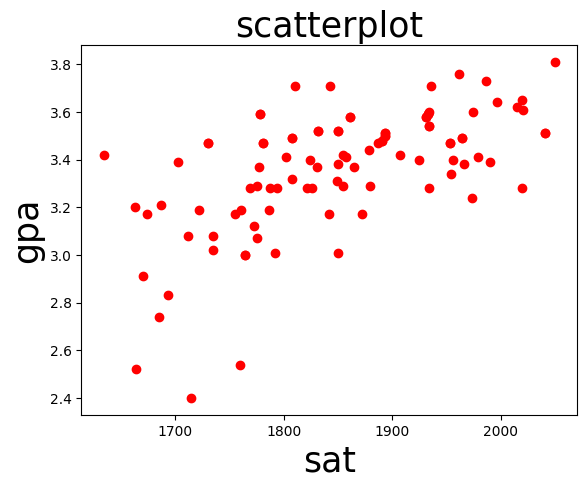

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x,y,color="r")
plt.xlabel("sat",fontsize=25)
plt.ylabel("gpa",fontsize=25)
plt.title("scatterplot",fontsize=25)

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

,SAT
11,1775
47,1956
85,1953
28,2020
93,1832
...,...
60,1964
71,1778
14,1773
92,1893


In [13]:
x_test

,SAT
83,2050
53,1634
70,1933
45,1925
44,1990
39,1831
22,1663
80,1810
10,1735
0,1714


In [14]:
y_train

11    3.07
47    3.40
85    3.47
28    3.28
93    3.52
      ... 
60    3.49
71    3.59
14    3.12
92    3.51
51    3.42
Name: GPA, Length: 70, dtype: float64

In [15]:
y_test

83    3.81
53    3.42
70    3.59
45    3.40
44    3.39
39    3.37
22    3.20
80    3.71
10    3.02
0     2.40
18    3.17
30    3.28
73    3.60
33    3.29
90    3.50
4     2.83
76    3.64
77    3.65
12    3.08
31    3.28
55    3.47
88    3.49
26    3.28
42    3.38
69    3.58
15    3.17
40    3.37
96    3.58
9     3.01
72    3.60
Name: GPA, dtype: float64

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([3.67199037, 3.04680594, 3.49615725, 3.48413447, 3.58181954,
       3.34286683, 3.0903885 , 3.31130704, 3.1985935 , 3.16703371,
       3.35939815, 3.24969031, 3.4976601 , 3.37893517, 3.43604336,
       3.13547392, 3.59233947, 3.62690496, 3.1985935 , 3.4976601 ,
       3.42702628, 3.54274551, 3.27674156, 3.54575121, 3.49315155,
       3.40448357, 3.39396364, 3.38795225, 3.37142093, 3.55927683])

Text(0.5, 1.0, 'SAT-GPA SCATTER')

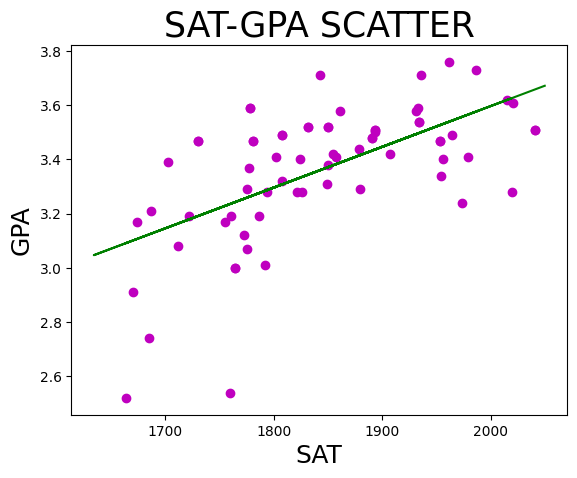

In [17]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color="m")
plt.plot(x_test,y_pred,color="g")
plt.xlabel("SAT",fontsize=18)
plt.ylabel("GPA",fontsize=18)
plt.title("SAT-GPA SCATTER",fontsize=25)

In [18]:
print("slop is",model.coef_)

slop is [0.00150285]


In [19]:
print("constant is",model.intercept_)

constant is 0.591153607650964


In [20]:
df1=pd.DataFrame({"actual value":y_test,"predicted value":y_pred,"difference":y_test-y_pred})
df1

,actual value,predicted value,difference
83,3.81,3.671990,0.138010
53,3.42,3.046806,0.373194
70,3.59,3.496157,0.093843
45,3.40,3.484134,-0.084134
44,3.39,3.581820,-0.191820
39,3.37,3.342867,0.027133
22,3.20,3.090389,0.109611
80,3.71,3.311307,0.398693
10,3.02,3.198594,-0.178594
0,2.40,3.167034,-0.767034


In [21]:
from sklearn.metrics import mean_absolute_error
MAE=mean_absolute_error(y_pred,y_test)
MAE

0.1584568108137395

In [22]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MAPE

0.05080547355744477

In [23]:
from sklearn.metrics import mean_squared_error
MSE=mean_squared_error(y_test,y_pred)
MSE

0.049471500920990646

In [24]:
from sklearn.metrics import root_mean_squared_error
RMSE=root_mean_squared_error(y_test,y_pred)
RMSE

0.22242189847447721

In [25]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.39340452056267294